In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

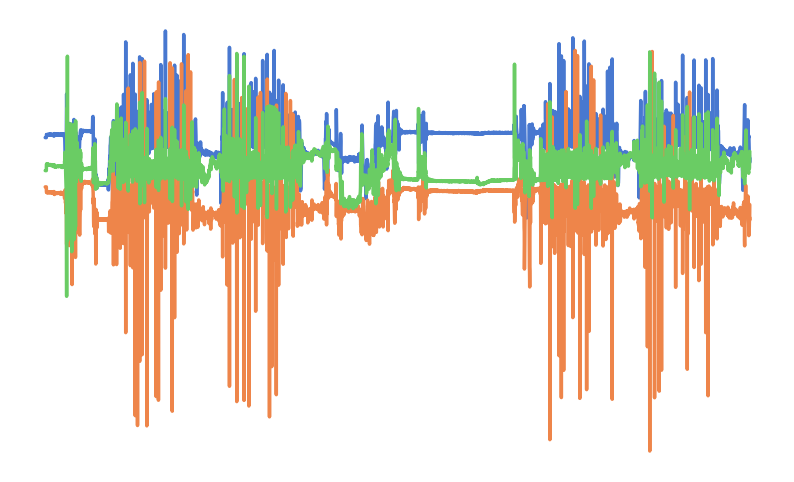

In [24]:
# Load the CSV file
file_path = '../../TestData/06-09-2024/debrah/cardiac_arrest/2/smartwatch_data/sync_smartwatch.csv'  # Update this with your file path
smartwatch_data = pd.read_csv(file_path)

# Set the Seaborn style
# Set the Seaborn style and color palette
sns.set(style="white", palette="muted")

# Create the plot with Seaborn and enhance the aesthetics
plt.figure(figsize=(10, 6))
sns.lineplot(data=smartwatch_data[['sw_value_X_Axis', 'sw_value_Y_Axis', 'sw_value_Z_Axis']], 
             dashes=False, linewidth=2.5)

# Remove axes, labels, and titles
plt.legend([], [], frameon=False)
plt.axis('off')

# Save the plot with a transparent background
plt.savefig('./figures/smartwatch_plot_seaborn.png', transparent=True, bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()

In [3]:
!module load ffmpeg
!ffmpeg 

ffmpeg version 4.3 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/opt/conda/conda-bld/ffmpeg_1597178665428/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeh --cc=/opt/conda/conda-bld/ffmpeg_1597178665428/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libsw

MovieWriter stderr:
Unknown encoder 'libx264'



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '800x600', '-pix_fmt', 'rgba', '-r', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-vcodec', 'libx264', '-y', './output/visualized_video/accelerometer_animation.mp4']' returned non-zero exit status 1.

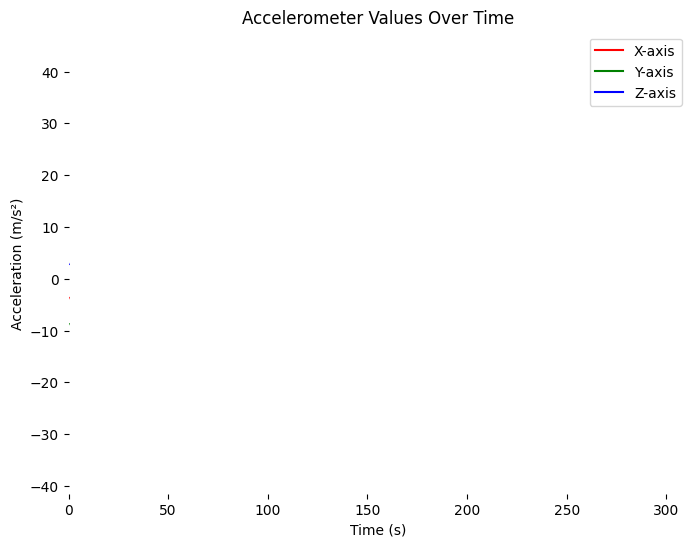

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


sw_data_path = "/standard/UVA-DSA/NIST EMS Project Data/EgoExoEMS_CVPR2025/Dataset/Final/wa1/cardiac_arrest/5/smartwatch_data/sync_smartwatch.csv"
# Load your data
data = pd.read_csv(sw_data_path)  # Make sure to adjust the path if needed
x_values = data['sw_value_X_Axis']
y_values = data['sw_value_Y_Axis']
z_values = data['sw_value_Z_Axis']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, len(x_values) / 30)  # Time in seconds on the x-axis
ax.set_ylim(min(x_values.min(), y_values.min(), z_values.min()) - 1,
            max(x_values.max(), y_values.max(), z_values.max()) + 1)
ax.set_title('Accelerometer Values Over Time')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Acceleration (m/s²)')

# Initialize lines for each axis
line_x, = ax.plot([], [], label='X-axis', color='r')
line_y, = ax.plot([], [], label='Y-axis', color='g')
line_z, = ax.plot([], [], label='Z-axis', color='b')

# remove lines 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend()

# Initialize animation
def init():
    line_x.set_data([], [])
    line_y.set_data([], [])
    line_z.set_data([], [])
    return line_x, line_y, line_z

# Update function for each frame
def animate(i):
    # Time sequence based on 30Hz frame rate
    t = np.linspace(0, i / 30, i + 1)
    line_x.set_data(t, x_values[:i + 1])
    line_y.set_data(t, y_values[:i + 1])
    line_z.set_data(t, z_values[:i + 1])
    return line_x, line_y, line_z

# Create and save animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x_values), interval=1000/30, blit=True)
ani.save('./output/visualized_video/accelerometer_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
